# Features extraction for sound  

we must extract the characteristics of our audio signal that are most relevant to the problem we are trying to solve.
This process is known as feature extraction.

## Contents

#### 1.Time domain features: 
zero-crossing rate (ZCR), characterizing energy using short time energy (STE) and root mean square energy (RMSE), separating harmonic & percussive signals.

#### 2.Frequency domain features:

 chroma-related features such as power spectrum chromagram, energy spectrum chromagram & chroma energy distribution normalized statistics (CENS), Constant-Q spectrogram &Chroma Constant-Q transform(cqt) spectrogram.

#### 3.Spectrum shape based features:

spectral centroids, spectral contrast, spectral rolloff, mel-frequency cepstral coefficients (MFCCs), mel energy(magnitude) spectrogram, logmel energy(magnitude) spectrogram, mel power spectrogram & logmel power spectrogram.

The cube below is often used to illustrate the time and frequency domains.  The time domain measurements monitor the signal amplitude over time and the frequency domain monitors the signal amplitude by individual frequency.

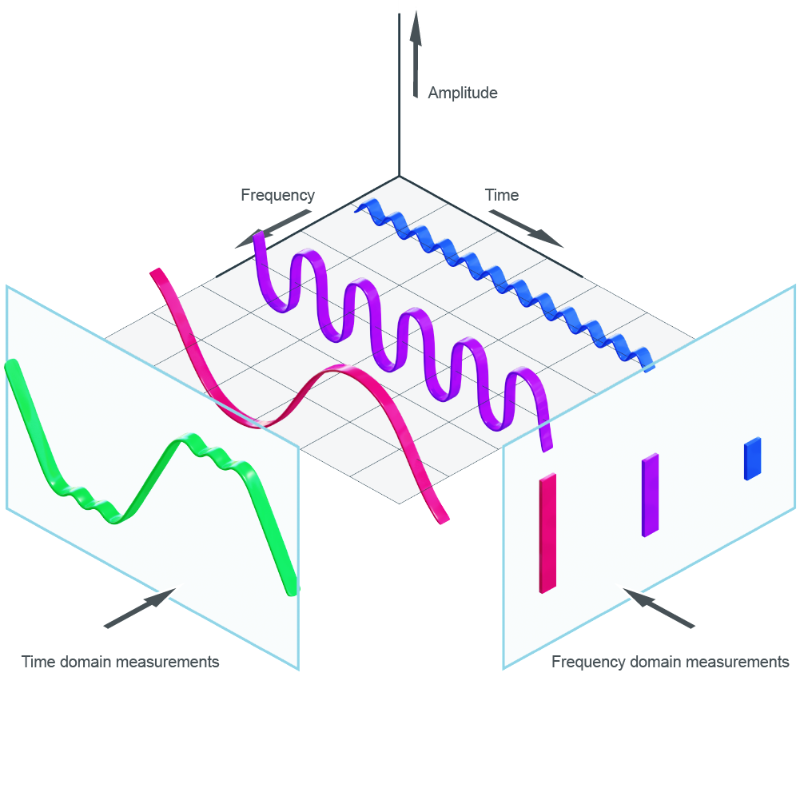

In [7]:
from IPython.display import display, Image
display(Image(filename='time-domain.png'))

#### spectrogram

A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.

In the following, we will briefly explain the features.

## Filter Banks

Computing filter banks and MFCCs involve somewhat the same procedure, where in both cases filter banks are computed and with a few more extra steps MFCCs can be obtained. In a nutshell, a signal goes through a pre-emphasis filter; then gets sliced into (overlapping) frames and a window function is applied to each frame; afterwards, we do a Fourier transform on each frame (or more specifically a Short-Time Fourier Transform) and calculate the power spectrum; and subsequently compute the filter banks. To obtain MFCCs, a Discrete Cosine Transform (DCT) is applied to the filter banks retaining a number of the resulting coefficients while the rest are discarded.

The first step is to apply a pre-emphasis filter on the signal to amplify the high frequencies. A pre-emphasis filter is useful in several ways: (1) balance the frequency spectrum since high frequencies usually have smaller magnitudes compared to lower frequencies, (2) avoid numerical problems during the Fourier transform operation and (3) may also improve the Signal-to-Noise Ratio (SNR).



The pre-emphasis filter can be applied to a signal x using the first order filter in the following equation:

$$y(t) = x(t)-\alpha \times x(t-1)$$

which can be easily implemented using the following line, where typical values for the filter coefficient (α) are 0.95 or 0.97.

After pre-emphasis, we need to split the signal into short-time frames. The rationale behind this step is that frequencies in a signal change over time, so in most cases it doesn’t make sense to do the Fourier transform across the entire signal in that we would lose the frequency contours of the signal over time. To avoid that, we can safely assume that frequencies in a signal are stationary over a very short period of time. Therefore, by doing a Fourier transform over this short-time frame, we can obtain a good approximation of the frequency contours of the signal by concatenating adjacent frames.

Typical frame sizes in speech processing range from 20 ms to 40 ms with 50% (+/-10%) overlap between consecutive frames. Popular settings are 25 ms for the frame size

After slicing the signal into frames, we apply a window function such as the Hamming window to each frame. 

There are several reasons why we need to apply a window function to the frames, notably to counteract the assumption made by the FFT that the data is infinite and to reduce spectral leakage.

We can now do an N-point FFT on each frame to calculate the frequency spectrum, which is also called Short-Time Fourier-Transform (STFT), where N is typically 256 or 512, NFFT = 512; and then compute the power spectrum (periodogram) using the following equation:

$$P = \frac{|FFT(x_i)|^2}{N}$$

where, $x_i$ is the ith frame of signal x.

The final step to computing filter banks is applying triangular filters, typically 40 filters, (nfilt = 40) on a Mel-scale to the power spectrum to extract frequency bands. The Mel-scale aims to mimic the non-linear human ear perception of sound, by being more discriminative at lower frequencies and less discriminative at higher frequencies. 

Each filter in the filter bank is triangular having a response of 1 at the center frequency and decrease linearly towards 0 till it reaches the center frequencies of the two adjacent filters where the response is 0, as shown in this figure:

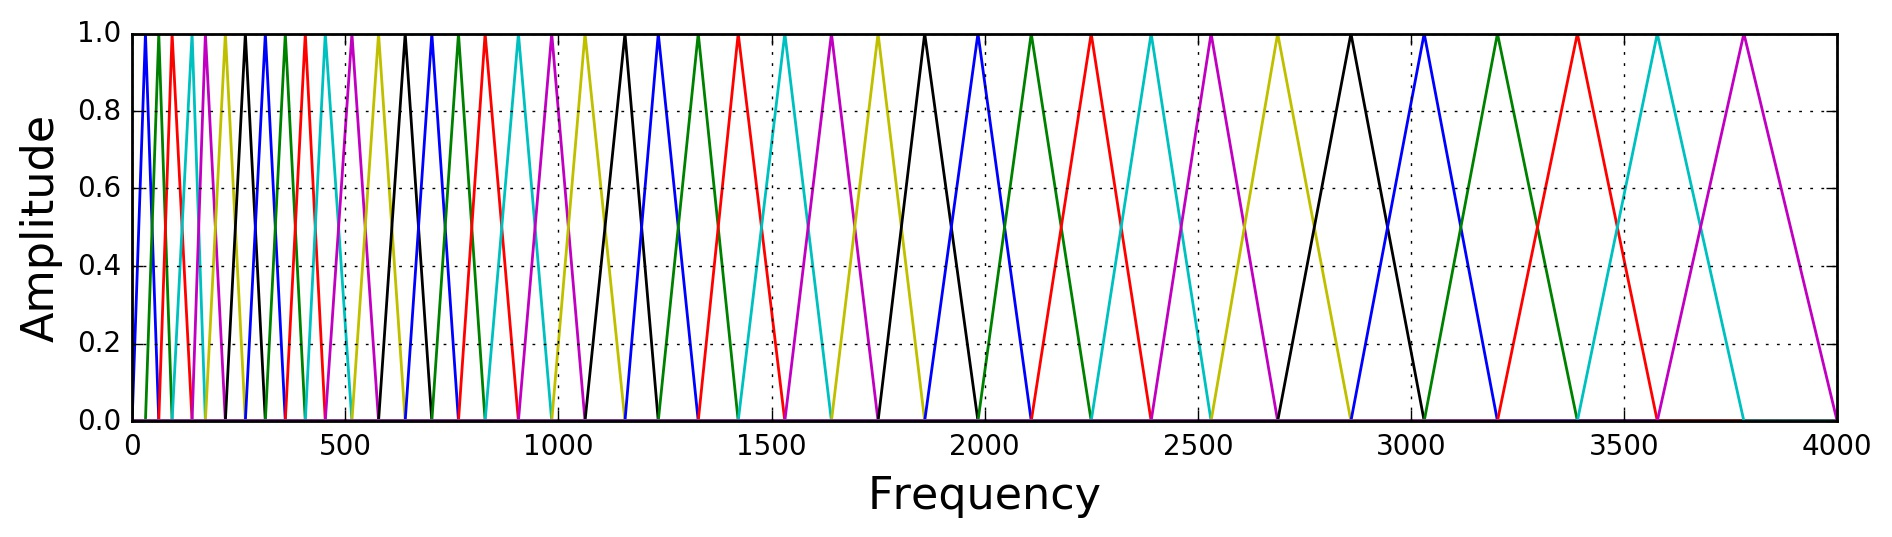

In [8]:
from IPython.display import display, Image
display(Image(filename='mel_filters.jpg'))

After applying the filter bank to the power spectrum (periodogram) of the signal, we obtain the following spectrogram.

## Zero Crossing Rate

The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

## Spectral Centroid

It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end.

## Spectral contrast

Octave-based Spectral Contrast (OSC) was developed to represent the spectral characteristics of a musical piece. It considers the spectral peak and valley in each sub-band separately.

In general, spectral peaks correspond to harmonic components and spectral valleys correspond to non-harmonic components or noise in a music piece. Therefore, the difference between spectral peaks and spectral valleys will reflect the spectral contrast distribution.

## Spectral Rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

## MFCC

This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.

MFCC are cepstral coefficients derived on a twisted frequency scale centerd on human auditory perception. In the computation of MFCC, the first thing is windowing the speech signal to split the speech signal into frames. Since the high frequency formants process reduced amplitude compared to the low frequency formants, high frequencies are emphasized to obtain similar amplitude for all the formants. After windowing, Fast Fourier Transform (FFT) is applied to find the power spectrum of each frame. Subsequently, the filter bank processing is carried out on the power spectrum, using mel-scale. The DCT is applied to the speech signal after translating the power spectrum to log domain in order to calculate MFCC coefficients. The formula used to calculate the mels for any frequency is :

$$ F_{mel}  = 2595 \, \times \, log_{10} (1 + \frac{F_{Hz}}{ 700})$$

where $F_{mel}$ is the frequency (mels) and $F_{Hz}$ is the frequency (Hz).

The MFCCs are calculated using this equation:

$$ C(i) = \sum_{j=1}^{F} log{X_j}\,\times \,\cos{(\frac{\pi i(j-0.55)}{F})} \,\,\,\,\,\, 1\leq i\leq F$$

<br> F : number of the filter
<br> $X_j$ : output of $j^{th}$ filter
<br> $C(i)$ : the final mfcc coefficients

The block diagram of the MFCC processor can be seen below figure.

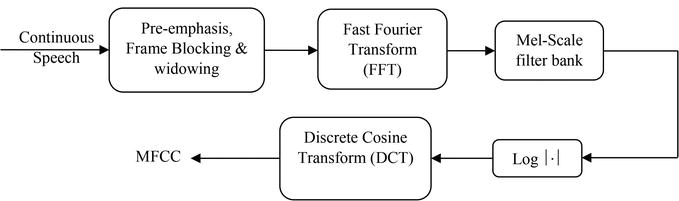

In [9]:
from IPython.display import display, Image
display(Image(filename='MFCC.png'))

The analysis of the cepstrum is called quefrency analysis (the naming is a physicist' inside-joke to drawing a direct parallel to frequency analysis in the spectrum domain) or liftering (a parallel to filtering in the spectrum domain). Cepstrum features can be used for pitch detection, and speech recognition and enhancement.


Mel-frequency cepstral coefficients represent the short-time power an audio clip based on the discrete cosine transform of the log power spectrum on a non-linear mel scale. The difference between a cepstrum and the mel-frequency cepstrum (MFC) is that in the MFC, the frequency bands are equally spaced on the mel scale to more closely resemble the human auditory system's response as opposed to the linearly-spaced bands in the normal spectrum. This frequency warping allows for better representation of sound and is especially useful in audio compression.

## Energy & RMSE

The energy of a signal corresponds to the total magnitude of the signal. For audio signals, that roughly corresponds to how loud the signal is. The energy in a signal is defined as

$$ Energy = \sum_n{|x(n)|^2}$$

The root-mean-square energy (RMSE) in a signal is defined as

$$ RMSE =	\sqrt{\frac{1}{N} \times\sum_n{|x(n)|^2}} $$

## Separation of Harmonic & Percussive Signals

On a very coarse level, many sounds can be categorized as either of the harmonic or percussive sound class. Harmonic sounds are sounds we perceive to have a specific pitch, whereas percussive sounds are often perceived as the result of two colliding objects. Percussive sounds tend to have a clear localization in time moreso than a particular pitch. More granular sound classes can be classified by its harmonic-percussive components ratio. For example, a note played on the piano has a percussive onset (marked by the hammer hitting the strings) preceding a harmonic tone (the result of the vibrating string).

The value of mapping both the time and phase content of a signal in distinguishing between harmonic and percussive components, makes the STFT spectral representation important. The time-frequency bin of the STFT for harmonic component of an input signal is expected to look more horizontal than vertical/time-dependent structure that is a percussive component.

## Chroma related features

Chroma features are a powerful representation of music audio in which we use a 12-element representation of spectral energy called a chroma vector where each of the 12 bins represeent the 12 equal-tempered pitch class of western-type music (semitone spacing) or (12 distinct semitones (or chroma) of the musical octave). It can be computed from the logarithmic short-time Fourier transform of the input sound signal, also called a chromagram or a pitch class profile.

A chroma vector is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

Another chroma-based feature is chroma energy distribution normalized statistics (CENS) which is typically used to identify similarity between different interpretations of the music given. The main idea of CENS is that taking statistics over large windows of an audio file smooths local deviations in tempo, articulation, and musical ornaments. CENS are typically implemented for audio matching and similarity tasks.

## Constant Q-transform (CQT)

The constant-Q transform transforms a data series to the frequency domain. It is related to the Fourier transform and very closely related to the complex Morlet wavelet transform. In general, the transform is well suited to musical data and proves useful where frequencies span several octaves.

Unlike the Fourier transform, but similar to the mel scale, the constant-Q transform (Wikipedia) uses a logarithmically spaced frequency axis.

###### Now let's code! :)

### Libraries:

In [1]:
# first, we import necessary libraries & mudules in jupytter notebook.

import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import glob
import pydub
import sklearn
import pandas as pd
import seaborn as sb
sb.set(style="white", palette="muted")

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(precision=3)

#### we used ESC-50 datasets for show features .

In [3]:
# Data storage is in:

direction = 'H:/practic-work(12$$$)/feature sound/ESC-50 datasets/data'

In [4]:
df = pd.read_csv('H:/practic-work(12$$$)/feature sound/ESC-50 datasets/esc50.csv')

#### load one clip randomely and compute some features.

In [5]:
class Clip:
    """A single 5-sec long recording."""
    
    RATE = 44100   # All recordings in ESC are 44.1 kHz
    FRAME = 512    # Frame size in samples
    
    class Audio:
        """The actual audio data of the clip.
        
            Uses a context manager to load/unload the raw audio data. This way clips
            can be processed sequentially with reasonable memory usage.
        """
        
        def __init__(self, path):
            self.path = path
        
        def __enter__(self):
            # Actual recordings are sometimes not frame accurate, so we trim/overlay to exactly 5 seconds.
            # load audio:
            self.signal, self.sample_rate = librosa.load(self.path, sr=Clip.RATE, duration=5)
            return(self)
        
        def __exit__(self, exception_type, exception_value, traceback):
            if exception_type is not None:
                print (exception_type, exception_value, traceback)
            del self.signal
            
        
    def __init__(self, filename):
        # We separate the clip specifications from its name such as
        #         filename : 2-209477-A-25.wav
        #             path : G:\practic-work(12$$$)\feature sound\ESC-50 datasets\data\2-98866-A-47.wav
        #         category : true class is number between 0 util 49
        #            index : index of clip on list
        #       class_name : crying-baby
        
        self.filename = os.path.basename(filename)
        self.path = os.path.abspath(filename)  
        self.category = self.filename.split('-')[3][:-4] 
        self.index = df[df["Filename"] == self.filename].index[0] 
        self.class_name = df.Category[self.index]  
        self.audio = Clip.Audio(self.path)
        
        
        with self.audio as audio:
            self._compute_logmel_energy_spectrogram(audio)
            self._compute_logmel_power_spectrogram(audio)
            self._compute_mfcc(audio)    
            self._compute_zcr(audio)
            self._compute_ste(audio)
            self._compute_rmse(audio)
            self._split_silence_from_signal(audio)
            self._split_Harmonic_Percussive(audio)
            self._split_Harmonic_Percussive_spectrogram(audio)
            self._compute_chroma(audio)
            self._compute_constant_Q(audio)
            self._spectral_centroid(audio)
            self._spectral_contrast(audio)
            self._spectral_rolloff(audio)
                
    def _compute_logmel_energy_spectrogram(self,audio):
        self.mel_energy_spectrogram = librosa.feature.melspectrogram(audio.signal, sr=Clip.RATE, hop_length=Clip.FRAME ,n_mels=40,power=1)
        self.logmel_energy_spectrogram = librosa.amplitude_to_db(self.mel_energy_spectrogram)
        
    def _compute_logmel_power_spectrogram(self,audio):
        self.mel_power_spectrogram = librosa.feature.melspectrogram(audio.signal, sr=Clip.RATE, hop_length=Clip.FRAME ,n_mels=40,power=2)
        self.logmel_power_spectrogram = librosa.power_to_db(self.mel_power_spectrogram)
        
    def _compute_mfcc(self, audio):
        # MFCC computation with default settings (2048 FFT window length, 512 hop length, 40 bands)
        self.mfcc = librosa.feature.mfcc(S=self.logmel_energy_spectrogram, n_mfcc=13, sr=Clip.RATE)
        
    def _compute_zcr(self, audio):
        # Zero-crossing rate : find the zero-crossing rate over time
        self.zcr = librosa.feature.zero_crossing_rate(audio.signal, frame_length=2048,hop_length=Clip.FRAME,center=True)[0]
    
    
    def _compute_ste(self, audio):
        # Short Time Energy (STE)
        self.frame_length = 2048
        self.hop_length=Clip.FRAME #512
        self.ste = np.array([sum(abs(audio.signal[i:i+self.frame_length]**2)) for i in range(0, len(audio.signal), self.hop_length)])
    
        
    def _compute_rmse(self, audio): 
        # Root Mean Square Energy (RMSE)
        self.rmse = librosa.feature.rmse(audio.signal, frame_length=self.frame_length, hop_length=self.hop_length, center=True)[0]
   

    def _split_silence_from_signal(self,audio):
        # This function seprate silence from main signal.
        
        # Compute RMSE.
        RMSE = librosa.feature.rmse(audio.signal, frame_length=self.frame_length, hop_length=self.hop_length, center=True)[0]
    
        # Identify the first frame index where RMSE exceeds a threshold.
        thresh = 0.01
        frame_index = []
        self.silence =  np.zeros_like(audio.signal)
        
        for i in range(len(RMSE)):
            if RMSE[i]<thresh:
                frame_index.append(i)

        # Convert units of frames to samples.
        start_sample_index = librosa.frames_to_samples(frame_index, hop_length=self.hop_length)
        for i in range(len(start_sample_index)):
            self.silence[start_sample_index[i]:start_sample_index[i]+512]=audio.signal[start_sample_index[i]:start_sample_index[i]+512]

    def _split_Harmonic_Percussive(self,audio):
        self.harmonic, self.percussive = librosa.effects.hpss(audio.signal)

    def _split_Harmonic_Percussive_spectrogram(self,audio):
        self.D = librosa.stft(audio.signal)
        self.H, self.P = librosa.decompose.hpss(self.D)
        
        self.Full_energy_spectrogram = librosa.amplitude_to_db(np.abs(self.D), ref=np.max)
        self.Harmonic_energy_spectrogram = librosa.amplitude_to_db(np.abs(self.H), ref=np.max)
        self.Percussive_energy_spectrogram = librosa.amplitude_to_db(np.abs(self.P), ref=np.max)
    
    def _compute_chroma(self,audio):
        # compute the chroma on power specrum.
        self.power_chroma = librosa.feature.chroma_stft(y=audio.signal, sr= Clip.RATE, hop_length=self.hop_length)
        
        # compute the chroma on  energy (magnitude) spectrum.
        # apply short-time fourier transform.
        S1 = np.abs(librosa.stft(audio.signal, n_fft=self.frame_length , hop_length=self.hop_length)) 
        self.energy_chroma = librosa.feature.chroma_stft(S=S1 , sr= Clip.RATE , hop_length=self.hop_length)
        
        # a pre-computed power spectrogram with a larger frame.
        S2 = np.abs(librosa.stft(audio.signal, n_fft=self.frame_length , hop_length=self.hop_length))**2
        self.chroma_p = librosa.feature.chroma_stft(S=S2 , sr= Clip.RATE)
        
        # chroma energy distribution normalized statistics (CENS).
        self.chroma_CENS = librosa.feature.chroma_cens(y=self.harmonic, sr=Clip.RATE, hop_length=self.hop_length)
        
    def _compute_constant_Q(self,audio):
        # constant-Q transform
        self.fmin = librosa.midi_to_hz(36)
        constant_Q = librosa.cqt(audio.signal, sr=Clip.RATE, fmin=self.fmin, n_bins=72, hop_length=self.hop_length)
        self.log_constant_Q = librosa.amplitude_to_db(np.abs(constant_Q))
        
        # compute Chroma Constant-Q transform(cqt) spectrogram.
        self.chroma_cqt = librosa.feature.chroma_cqt(audio.signal, sr=Clip.RATE, hop_length=self.hop_length)
    
    def _spectral_centroid(self,audio):
        # compute the spectral centroid for each frame in a signal.
        spectral_centroids = librosa.feature.spectral_centroid(y=audio.signal, sr=Clip.RATE)[0]
        
        # compute the time variable for visualization.
        frames = range(len(spectral_centroids))
        self.f_times = librosa.frames_to_time(frames)

        # normalize the spectral centroid for visualization.
        self.normalizes_spectral_centroids = sklearn.preprocessing.minmax_scale(spectral_centroids, axis=0)
        
    def _spectral_contrast(self,audio):
        self.Spectral_contrast = librosa.feature.spectral_contrast(y=self.harmonic,sr=Clip.RATE)
    
    def _spectral_rolloff(self,audio):
        self.rolloff = librosa.feature.spectral_rolloff(y=audio.signal, sr=Clip.RATE)[0]

        # compute the time variable for visualization.
        frame = range(len(self.rolloff))
        self.f_time = librosa.frames_to_time(frame)

        # normalize the spectral centroid for visualization.
        self.normalizes_rolloff = sklearn.preprocessing.minmax_scale(self.rolloff, axis=0)
        


In [6]:
import random
random.seed(12)

# You can reload this cell to get a different clip at every try.

import IPython.display

all_recordings = glob.glob(f'{direction}/*.wav')
clip = Clip(all_recordings[random.randint(0, len(all_recordings) - 1)])    


with clip.audio as audio:
    figure = plt.figure(figsize=(14,80))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
    
    ############### show raw signal:
    plt.subplot(24, 2, 1)
    plt.title('Raw signal of {0} : {1}'.format(clip.class_name, clip.filename), fontweight="bold", fontsize=12)
    plt.plot(np.arange(0, len(audio.signal)) / 44100.0, audio.signal)
    plt.xlabel('Time = 5 sec')
    plt.ylabel('Ampitude')
    plt.grid('on')
    
    ############### show ZCR:
    plt.subplot(24, 2, 2)
    zcrs_x = range(0, len(clip.zcr))
    zcrs_y = clip.zcr
    plt.plot(zcrs_x, zcrs_y, 'o', color='black') # plot ZCR per frame as points
    plt.plot(clip.zcr) # plot time-series change in ZCRs
    plt.title("Avrage zero crossing rate", fontweight="bold", fontsize=12)
    plt.xlabel('Frames')
    
    ############### show Mel energy spectrogram & Mel power spectrogram:
    # enrgy
    plt.subplot(24, 2, 3)
    librosa.display.specshow(clip.mel_energy_spectrogram, sr=44100, x_axis='frames', y_axis='linear', cmap='RdBu_r')
    plt.title("Mel energy spectrogram", fontweight="bold", fontsize=12)
    plt.colorbar()
    
    # power
    plt.subplot(24, 2, 4)
    librosa.display.specshow(clip.mel_power_spectrogram, sr=44100, x_axis='frames', y_axis='linear', cmap='RdBu_r')
    plt.title("Mel power spectrogram", fontweight="bold", fontsize=12)
    plt.colorbar()
    
    ############### show Log-Mel energy spectrogram & Log-Mel power spectrogram:
    # energy
    plt.subplot(24, 2, 5)
    librosa.display.specshow(clip.logmel_energy_spectrogram, sr=44100, x_axis='time', y_axis='linear',cmap=plt.cm.afmhot)
    plt.title("Log-Mel energy spectrogram", fontweight="bold", fontsize=12)
    plt.colorbar()
    
    # power
    plt.subplot(24, 2, 6)
    librosa.display.specshow(clip.logmel_power_spectrogram, sr=44100, x_axis='time', y_axis='linear',cmap=plt.cm.afmhot)
    plt.title("Log-Mel power spectrogram", fontweight="bold", fontsize=12)
    plt.colorbar()
    
    ############### show MFCC spectrogram:
    plt.subplot(24, 2, 7)
    librosa.display.specshow(clip.mfcc, sr=44100, x_axis='time', y_axis='linear',cmap=plt.cm.cubehelix)
    plt.title("MFCC spectrogram", fontweight="bold", fontsize=12)
    plt.colorbar()
    
    ################ show Energy of signal:
    plt.subplot(24, 2, 8)
    # raw signal
    plt.plot(np.arange(0, len(audio.signal)) / 44100.0, audio.signal ,color='lightsteelblue', label='signal')
    
    # ste
    frames = range(len(clip.ste))
    t = librosa.frames_to_time(frames, sr=44100, hop_length=512)
    #  normalilize  ste energy between 0 , 1
    ste_normilized = clip.ste/len(clip.ste)
    plt.plot(t,ste_normilized ,color='red', linestyle='dashed', markersize=12, label='STE')
    
    # rmse
    plt.plot(t,clip.rmse ,color='green', markersize=12, label='RMSE')
    plt.title("Energy of signal", fontweight="bold", fontsize=12 )
    plt.xlabel('Time = 5 sec')
    plt.grid('on')
    plt.legend(loc='best')
    
    ################ show silence & non-silence on signal:
    plt.subplot(24,2,9)
    # raw signal
    plt.plot(np.arange(0, len(audio.signal)) / 44100.0,audio.signal, color= 'lightsteelblue',markersize=10, label='signal')
    # silence 
    plt.plot(np.arange(0, len(clip.silence)) / 44100.0 ,clip.silence,color='red', markersize=25, label='silence')  
    plt.title("Silence & None silence of signal", fontweight="bold", fontsize=12 )
    plt.xlabel('Time = 5 sec')
    plt.grid('on')
    plt.legend(loc='best')
    
    ################ show Harmonic + Percurssive of signal:
    plt.subplot(24,2,10)
    librosa.display.waveplot(clip.harmonic, sr=clip.RATE, color='blue', alpha=0.5 , label="harmonic")
    librosa.display.waveplot(clip.percussive, sr=clip.RATE , color='red', alpha=0.5, label="percussive")
    plt.title('Harmonic + Percussive', fontweight="bold", fontsize=12 )
    plt.legend(loc='best')
    
    ################ show Harmonic + Percussive on spectrogram:
    plt.subplot(24,2,11)
    librosa.display.specshow(clip.Full_energy_spectrogram , y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Full energy spectrogram: Harmonic + Percussive', fontweight="bold", fontsize=12 )

    # harmonic spectrogram will show more horizontal/pitch-dependent changes
    plt.subplot(24, 2, 13)
    librosa.display.specshow(clip.Harmonic_energy_spectrogram,  y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Harmonic energy spectrogram', fontweight="bold", fontsize=12 )
    plt.subplot(24, 2, 15)

    # percussive spectrogram will show more vertical/time-dependent changes
    librosa.display.specshow(clip.Percussive_energy_spectrogram, y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Percussive energy spectrogram', fontweight="bold", fontsize=12 )

    ############### show Chroma features :
    # Power spectrum
    plt.subplot(24, 2, 12)
    librosa.display.specshow(clip.power_chroma, y_axis='chroma', x_axis='time', cmap='RdBu_r')
    plt.colorbar()
    plt.title('Power spectrum chromagram', fontweight="bold", fontsize=12)
    # Energy spectrum
    plt.subplot(24, 2, 14)
    librosa.display.specshow(clip.energy_chroma, y_axis='chroma', x_axis='time', cmap='RdBu_r')
    plt.colorbar()
    plt.title('Energy spectrum chromagram', fontweight="bold", fontsize=12)
    # Pre-computed power spectrum chromagram
    plt.subplot(24, 2, 16)
    librosa.display.specshow(clip.chroma_p, y_axis='chroma', x_axis='time', cmap='RdBu_r')
    plt.colorbar()
    plt.title('Pre-computed power spectrum chromagram with larger frame size', fontweight="bold", fontsize=12)
    # CENS
    plt.subplot(24, 2, 18)
    librosa.display.specshow(clip.chroma_CENS,y_axis='chroma', x_axis='time', cmap='RdBu_r')
    plt.colorbar()
    plt.title('chroma energy distribution normalized statistics (CENS)', fontweight="bold", fontsize=12)
    
    ################## show Constant Q transform:
    # cqt
    plt.subplot(24, 2, 17)
    librosa.display.specshow(clip.log_constant_Q, sr=clip.RATE, x_axis='time', y_axis='cqt_note', fmin=clip.fmin, cmap='coolwarm')
    plt.colorbar()
    plt.title('Constant-Q spectrogram', fontweight="bold", fontsize=12)
    # chroma cqt
    plt.subplot(24, 2, 19)
    librosa.display.specshow(clip.chroma_cqt, sr=clip.RATE, x_axis='time', y_axis='cqt_note', cmap='coolwarm')
    plt.colorbar()
    plt.title('Chroma Constant-Q transform(cqt) spectrogram', fontweight="bold", fontsize=12)
                 
    ################ show spectral centroid:
    plt.subplot(24, 2, 20)
    # raw signal
    librosa.display.waveplot(audio.signal, sr=clip.RATE, alpha=0.4, label='signal')
    # spectral centroid
    plt.plot(clip.f_times, clip.normalizes_spectral_centroids, color='black', label='spectral centroids')
    plt.title('spectral centroid ', fontweight="bold", fontsize=12)
    plt.ylabel('Hz')
    plt.legend(loc='best') 
    
    ############## show spectral contrast:
    plt.subplot(24, 2, 22)
    librosa.display.specshow(clip.Spectral_contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral contrast ', fontweight="bold", fontsize=12)
    plt.ylabel('Frequency bands')
    
    ############# show spectral rolloff:
    plt.subplot(24, 2, 24)
    # raw signal
    librosa.display.waveplot(audio.signal, sr=clip.RATE, alpha=0.4, label='signal')
    # spectral centroid
    plt.plot(clip.f_time, clip.normalizes_rolloff, color='black', label='Roll-off frequency')
    plt.title('spectral rolloff ', fontweight="bold", fontsize=12)
    plt.ylabel('Hz')
    plt.legend(loc='best')

IPython.display.Audio(filename=clip.path, rate=Clip.RATE)    